# Preview Structure

In [6]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("dataset.csv")
# Preview structure

df1.head()

,Player ID,Level,Attempts,Time Played,Booster Used,Avg Daily Login,Level Completion Time,Specific Action Usage,Lives from Ads,Purchase Amount,Purchase Date,Purchase Type,Device Type,OS Version,Friend Invites Sent,Friend Invites Received,Guild Chat Messages,Facebook Connect Status,Social Engagement through Facebook
0,230936,480,20,800,14,16,921,Fish Usage,28,20.30,2024-01-28,In-App,Samsung Galaxy,19.3,7,0,8,Yes,low
1,231296,60,23,17048,29,6,50,Striped Candy Swipe,35,46.55,2024-01-28,In-App,Android,17.6,1,20,11,No,low
2,88142,95,120,7581,17,24,1576,Fish Usage,0,23.49,2024-01-28,In-App,iPhone,13.2,0,8,5,Yes,low
3,229735,293,269,4828,0,14,50,Extra Time Boost,0,0.71,2024-01-28,In-App,iPad,14.7,1,20,61,No,low
4,447702,10,94,1331,18,11,398,Special Candy Swap,9,4.41,2024-01-28,In-App,iPad,15.9,10,0,12,Yes,low


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Player ID                           2000 non-null   int64  
 1   Level                               2000 non-null   int64  
 2   Attempts                            2000 non-null   int64  
 3   Time Played                         2000 non-null   int64  
 4   Booster Used                        2000 non-null   int64  
 5   Avg Daily Login                     2000 non-null   int64  
 6   Level Completion Time               2000 non-null   int64  
 7   Specific Action Usage               2000 non-null   object 
 8   Lives from Ads                      2000 non-null   int64  
 9   Purchase Amount                     1244 non-null   float64
 10  Purchase Date                       1212 non-null   object 
 11  Purchase Type                       1244 no

In [8]:
cat_cols = df1.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df1[col].value_counts())



Value counts for Specific Action Usage:
Specific Action Usage
Fish Usage             356
Striped Candy Swipe    277
Special Candy Swap     268
Extra Moves            254
Wrapped Candy Blast    227
Extra Time Boost       204
Color Bomb Usage       131
Color Bomb Creation     82
Fish Blast              52
Rewarded_Boosters       47
Striped Candy Blast     39
Wrapped Candy Swap      36
Striped Candy Swap      27
Name: count, dtype: int64

Value counts for Purchase Date:
Purchase Date
2023-09-08    89
2023-11-15    44
2023-12-15    35
2023-11-12    34
2023-12-12    32
              ..
2024-01-13     1
2023-10-15     1
2023-10-09     1
2023-09-01     1
2023-12-18     1
Name: count, Length: 121, dtype: int64

Value counts for Purchase Type:
Purchase Type
In-App    1244
Name: count, dtype: int64

Value counts for Device Type:
Device Type
iPad              837
iPhone            716
Android           336
Samsung Galaxy     85
Google Pixel       26
Name: count, dtype: int64

Value counts for Fa

In [9]:
# There is only one category "In-App" in Purchase Type. To avoid redundency, we deleted the column.
df = df1.drop(columns=['Purchase Type'])

In [10]:
df.head()

,Player ID,Level,Attempts,Time Played,Booster Used,Avg Daily Login,Level Completion Time,Specific Action Usage,Lives from Ads,Purchase Amount,Purchase Date,Device Type,OS Version,Friend Invites Sent,Friend Invites Received,Guild Chat Messages,Facebook Connect Status,Social Engagement through Facebook
0,230936,480,20,800,14,16,921,Fish Usage,28,20.30,2024-01-28,Samsung Galaxy,19.3,7,0,8,Yes,low
1,231296,60,23,17048,29,6,50,Striped Candy Swipe,35,46.55,2024-01-28,Android,17.6,1,20,11,No,low
2,88142,95,120,7581,17,24,1576,Fish Usage,0,23.49,2024-01-28,iPhone,13.2,0,8,5,Yes,low
3,229735,293,269,4828,0,14,50,Extra Time Boost,0,0.71,2024-01-28,iPad,14.7,1,20,61,No,low
4,447702,10,94,1331,18,11,398,Special Candy Swap,9,4.41,2024-01-28,iPad,15.9,10,0,12,Yes,low


# Data Cleaning

In [11]:
# 1. Standardize Column Names
# Convert to lowercase and replace spaces with underscores
# ================================
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

print("Updated column names:")
print(df.columns)

Updated column names:
Index(['player_id', 'level', 'attempts', 'time_played', 'booster_used',
       'avg_daily_login', 'level_completion_time', 'specific_action_usage',
       'lives_from_ads', 'purchase_amount', 'purchase_date', 'device_type',
       'os_version', 'friend_invites_sent', 'friend_invites_received',
       'guild_chat_messages', 'facebook_connect_status',
       'social_engagement_through_facebook'],
      dtype='object')


In [12]:
# 2. Remove Player ID
# (Identifier column — not useful for modeling)
# ================================
if 'player_id' in df.columns:
    df.drop(columns=['player_id'], inplace=True)

In [13]:
# 3. Convert Date Columns
# ================================
if 'purchase_date' in df.columns:
    df['purchase_date'] = pd.to_datetime(df['purchase_date'], errors='coerce')
df['purchase_date'].head()

0   2024-01-28
1   2024-01-28
2   2024-01-28
3   2024-01-28
4   2024-01-28
Name: purchase_date, dtype: datetime64[ns]

In [14]:
# 4. Convert Yes/No Binary Columns
# ================================
if 'facebook_connect_status' in df.columns:
    df['facebook_connect_status'] = df['facebook_connect_status'].map({'Yes': 1, 'No': 0})
df['facebook_connect_status'].head()

0    1
1    0
2    1
3    0
4    1
Name: facebook_connect_status, dtype: int64

In [15]:
# 5. Handle Missing Values
# ================================
# Fill numeric columns with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with most frequent value
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [16]:
# 6. Normalize Categorical Text
# ================================
for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()
df[cat_cols].head()

,specific_action_usage,device_type,social_engagement_through_facebook
0,fish usage,samsung galaxy,low
1,striped candy swipe,android,low
2,fish usage,iphone,low
3,extra time boost,ipad,low
4,special candy swap,ipad,low


# Feature Engineering

## key indicators

### Create CHURN Variable

<Axes: xlabel='avg_daily_login'>

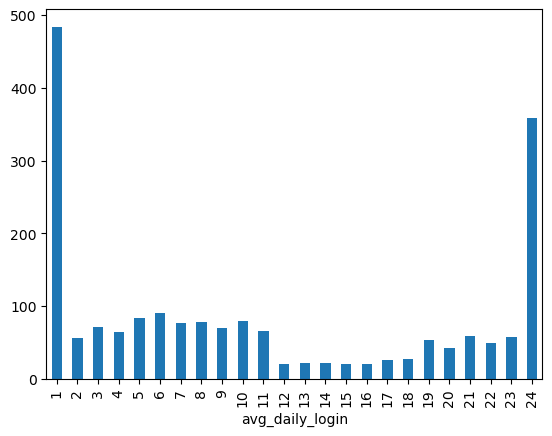

In [17]:
import matplotlib.pyplot as plt
plt.figure()
df['avg_daily_login'].value_counts().sort_index().plot(kind='bar')

In [18]:
df['churn'] = (
    (df['avg_daily_login'] <= 3) 
).astype(int)

In [19]:
df['churn'].value_counts(normalize=True)

churn
0    0.6945
1    0.3055
Name: proportion, dtype: float64

Unbalance structure on people who attend "hard_level". (Follow reality logic)

## Create Hard Level Variable

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['level_z'] = scaler.fit_transform(df[['level']])
threshold = df['level_z'].quantile(0.75)

df['hard_level'] = (df['level_z'] >= threshold).astype(int)

In [21]:
df['hard_level'].value_counts(normalize=True)

hard_level
0    0.7495
1    0.2505
Name: proportion, dtype: float64

In [22]:
df['hard_level'].value_counts(dropna=False)

hard_level
0    1499
1     501
Name: count, dtype: int64

In [23]:
# Drop 'avg_daily_login', 'level' and 'level_z'
df.drop(columns=['avg_daily_login', 'level', 'level_z'], errors='ignore', inplace=True)

In [24]:
df.to_csv("game_data.csv", index=False, encoding="utf-8-sig")

## Identify Confounders, Pre-treatments and Post-treatments

In [25]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

results = []

T = df['hard_level']
Y = df['churn']

def cramers_v(x, y):
    contingency = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency)[0]
    n = contingency.sum().sum()
    phi2 = chi2 / n
    r, k = contingency.shape
    return np.sqrt(phi2 / min(k-1, r-1))

for var in df.columns:
    if var in ['hard_level', 'churn', 'level_z','ps','sw','avg_daily_login','level']:
        continue
    
    x = df[var]
    
    # Continuous Variables
    if pd.api.types.is_numeric_dtype(x):
        corr_T, p_T = stats.spearmanr(x, T, nan_policy='omit')
        corr_Y, p_Y = stats.spearmanr(x, Y, nan_policy='omit')
        method = 'Spearman'
    else:
        try:
            corr_T = cramers_v(x, T)
            corr_Y = cramers_v(x, Y)
            p_T = p_Y = None
            method = 'Cramers V'
        except:
            continue

    strength = abs(corr_T) + abs(corr_Y)

    results.append({
        'variable': var,
        'corr_with_T': corr_T,
        'corr_with_Y': corr_Y,
        'method': method,
        'importance_score': strength
    })

corr_table = pd.DataFrame(results)

# Sort by Importance Score
corr_table = corr_table.sort_values(by='importance_score', ascending=False)
corr_table

,variable,corr_with_T,corr_with_Y,method,importance_score
7,purchase_date,0.298873,0.315696,Cramers V,0.614569
12,guild_chat_messages,0.160019,-0.028285,Spearman,0.188304
4,specific_action_usage,0.098520,0.074823,Cramers V,0.173343
9,os_version,0.092892,-0.062764,Spearman,0.155657
5,lives_from_ads,-0.076008,0.058469,Spearman,0.134477
3,level_completion_time,0.018095,-0.107138,Spearman,0.125234
0,attempts,-0.111828,-0.005182,Spearman,0.117010
10,friend_invites_sent,-0.074092,-0.032071,Spearman,0.106163
8,device_type,0.039616,0.054231,Cramers V,0.093847
13,facebook_connect_status,-0.067556,0.023174,Spearman,0.090730


### Distribution Checking

Check for extreme values.

#### Purchase_date

Min date: 2023-08-02 00:00:00
Max date: 2024-01-28 00:00:00


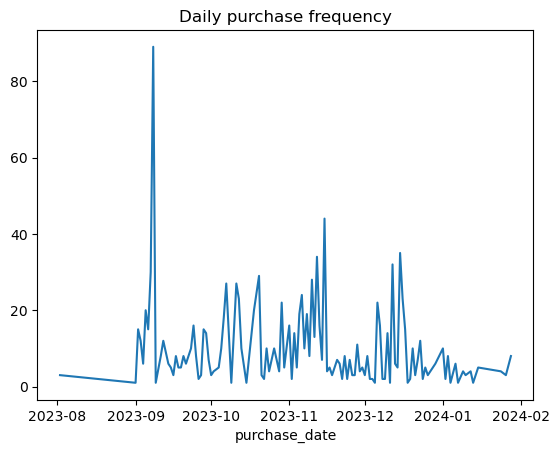

In [26]:
# Transfer to date time
df['purchase_date'] = pd.to_datetime(df['purchase_date'], errors='coerce')

# Minimum and Maximum Date
print("Min date:", df['purchase_date'].min())
print("Max date:", df['purchase_date'].max())

# Check for extreme values
df['purchase_date'].dt.date.value_counts().sort_index().plot(kind='line')
plt.title("Daily purchase frequency")
plt.show()

In [27]:
# Pre-processing purchase_date
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df['purchase_month'] = df['purchase_date'].dt.month # Time range 23-08-02 to 24-01-28

#### Device_type

In [28]:
print("device_type frequency:")
print(df['device_type'].value_counts(dropna=False))

print("\nUnique values:", df['device_type'].nunique())

device_type frequency:
device_type
ipad              837
iphone            716
android           336
samsung galaxy     85
google pixel       26
Name: count, dtype: int64

Unique values: 5


In [29]:
df['device_type'] = df['device_type'].replace({
    'samsung galaxy': 'android',
    'google pixel': 'android'
})


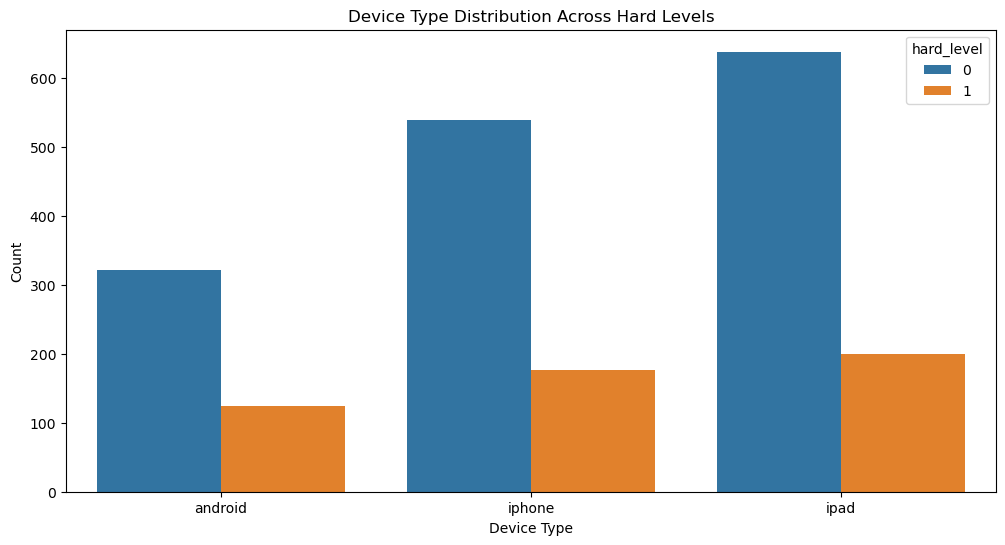

In [30]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='device_type', hue='hard_level')
plt.title("Device Type Distribution Across Hard Levels")
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.show()

#### OS_version

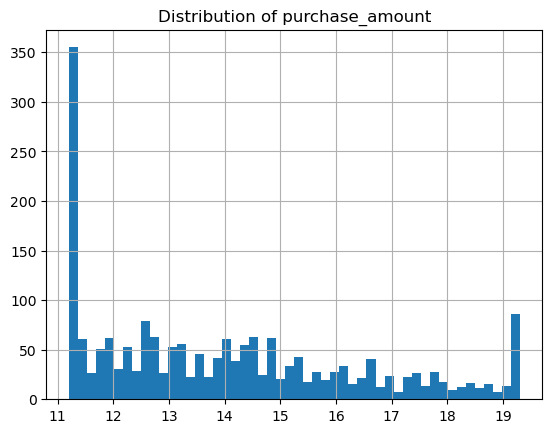

In [31]:
df['os_version'].hist(bins=50)
plt.title("Distribution of purchase_amount")
plt.show()

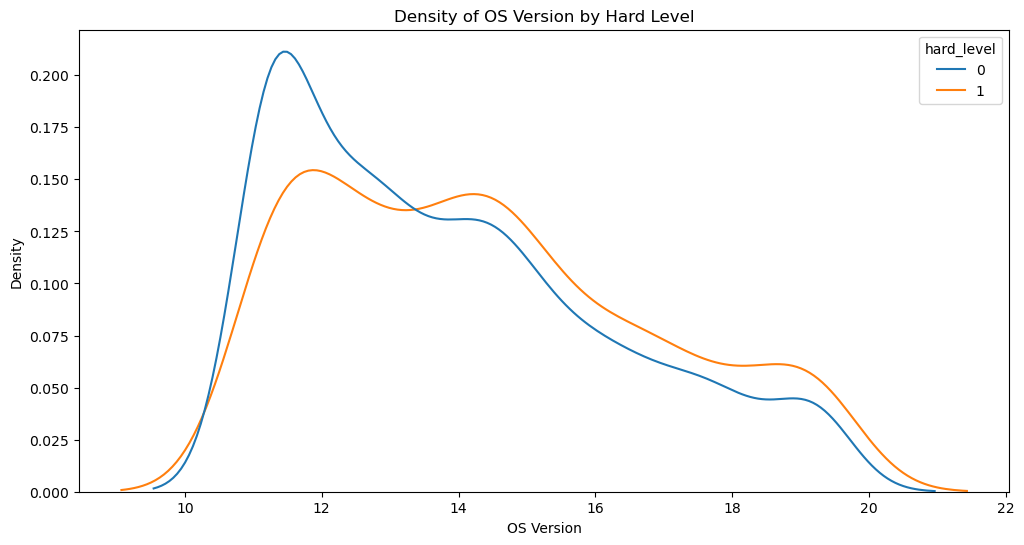

In [32]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df, x='os_version', hue='hard_level', common_norm=False)
plt.title("Density of OS Version by Hard Level")
plt.xlabel("OS Version")
plt.ylabel("Density")
plt.show()

#### Purchase_amount

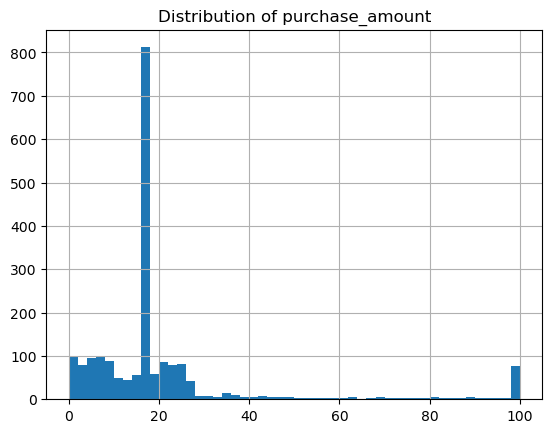

In [33]:
df['purchase_amount'].hist(bins=50)
plt.title("Distribution of purchase_amount")
plt.show()

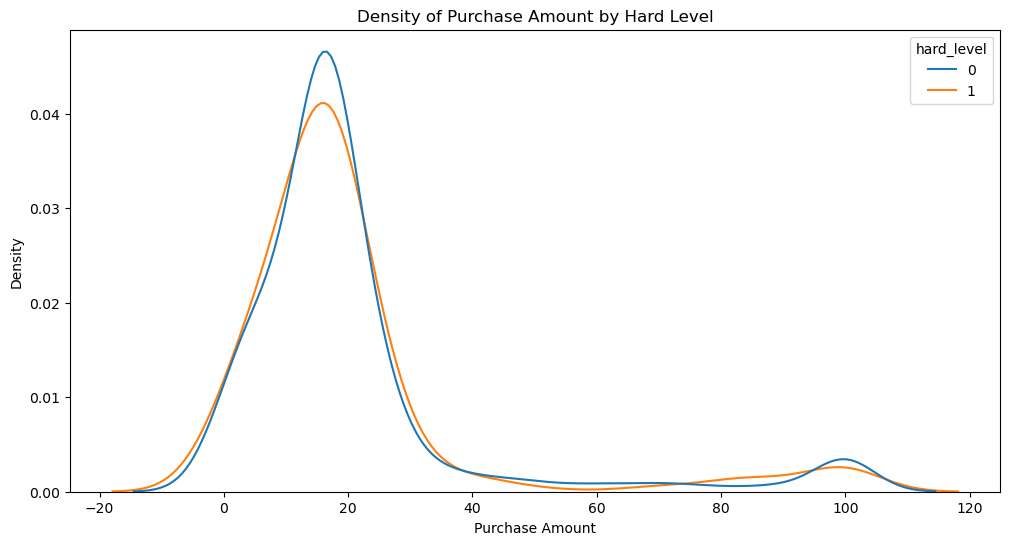

In [34]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df, x='purchase_amount', hue='hard_level', common_norm=False)
plt.title("Density of Purchase Amount by Hard Level")
plt.xlabel("Purchase Amount")
plt.ylabel("Density")
plt.show()